<a href="https://colab.research.google.com/github/Lucashenriquerocha/DWH_DL/blob/main/DWHDLK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Warehouse

In [1]:
import pandas as pd
import numpy as np

# Definindo o número de produtos
num_produtos = 600

# Criando um dicionário de produtos com IDs, nomes e categorias
produtos = {
    'produto_id': range(1, num_produtos + 1),  # IDs de produto de 1 a 600
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],  # Nomes de produto como "Produto 1", "Produto 2", ...
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)  # Categorias aleatórias para os produtos
}

# Criando o DataFrame de produtos
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas
num_vendas = 1000

# Criando um dicionário de vendas com data, ID do produto, quantidade e valor total
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-10', periods=30), num_vendas),  # Datas aleatórias entre 10 de abril de 2024 e 30 dias posteriores
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),  # IDs de produtos aleatórios dentro do intervalo definido
    'quantidade': np.random.randint(50, 200, num_vendas),  # Quantidades aleatórias de produtos vendidos
    'valor_total': np.random.randint(1000, 10000, num_vendas)  # Valores totais aleatórios para as vendas
}

# Criando o DataFrame de vendas
df_vendas = pd.DataFrame(data_vendas)

# Salvando os DataFrames em arquivos CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Lendo os DataFrames dos arquivos CSV
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames de vendas e produtos com base no ID do produto
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um arquivo CSV
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo o DataFrame do arquivo CSV criado
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprimindo o conteúdo do Data Warehouse
print("Conteudo do Data Warehouse:")
print(df_warehouse)

Conteudo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-15         115          90         5370  Produto 115  Eletrônicos
1    2024-04-26         115          50         8299  Produto 115  Eletrônicos
2    2024-04-19         115          68         5960  Produto 115  Eletrônicos
3    2024-04-25         206         171         7533  Produto 206    Alimentos
4    2024-05-02         206         157         5425  Produto 206    Alimentos
..          ...         ...         ...          ...          ...          ...
995  2024-04-29         453          84         9780  Produto 453       Roupas
996  2024-04-25         265         157         5585  Produto 265       Roupas
997  2024-04-26         119          75         3822  Produto 119    Alimentos
998  2024-05-09         492         129         7883  Produto 492    Alimentos
999  2024-04-29         461         163         8450  Produto 461    Alimentos

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           164         1533
Produto 10          135         9980
Produto 100         294        25821
Produto 102         417        19721
Produto 104         111         2808
...                 ...          ...
Produto 92          149         7080
Produto 93          175         5888
Produto 95          347        18075
Produto 96          167         2627
Produto 98          319        19386

[491 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         41447      1800998
Eletrônicos       39439      1695543
Roupas            43551      2004772

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-10        3908       179787
2024-04-11        4312       182722
2024-04-12        3451       135093
2024-04-13        41

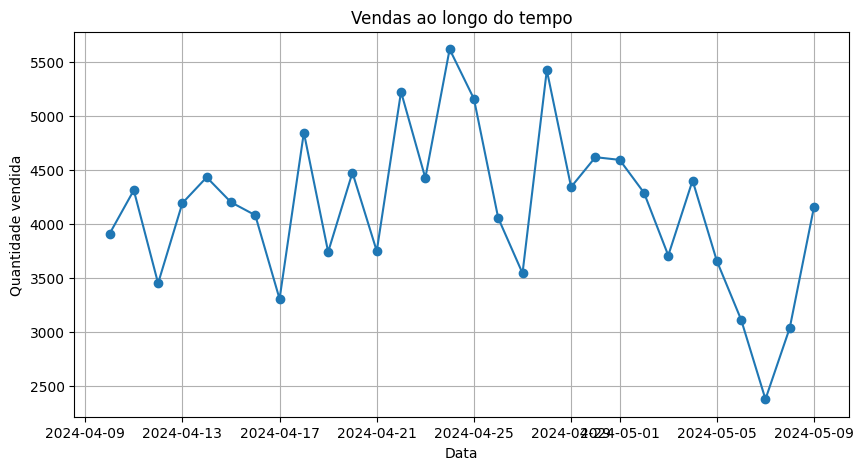


Análise de desempenho de produtos:
nome
Produto 1       1533
Produto 10      9980
Produto 100    25821
Produto 102    19721
Produto 104     2808
               ...  
Produto 92      7080
Produto 93      5888
Produto 95     18075
Produto 96      2627
Produto 98     19386
Name: valor_total, Length: 491, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV do data warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Analisando as vendas por produto, agrupando por nome do produto e somando quantidade e valor total
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade','valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Analisando as vendas por categoria de produto, agrupando por categoria e somando quantidade e valor total
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade','valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o tipo datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Analisando as tendências temporais das vendas, agrupando por data e somando quantidade e valor total
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Plotando um gráfico das vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()

# Analisando o desempenho de cada produto, somando o valor total das vendas por produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

data lake


In [3]:
import pandas as pd
import numpy as np
import os

# Verifica se o diretório 'data_lake' existe, se não, o cria.
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Número de arquivos a serem gerados no data lake e número de linhas por arquivo.
num_files = 10
num_rows_per_file = 1000

# Lista para armazenar os nomes dos arquivos e os DataFrames correspondentes.
dfs = []

# Loop para gerar dados aleatórios e salvá-los em arquivos CSV.
for i in range(num_files):
    # Gerando dados aleatórios para cada coluna.
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A','B','C'], num_rows_per_file)
    }

    # Criando um DataFrame a partir dos dados gerados.
    df = pd.DataFrame(data)

    # Nome do arquivo a ser salvo.
    file_name = f'data_lake/dados_{i+1}.csv'

    # Salvando o DataFrame como um arquivo CSV.
    df.to_csv(file_name, index=False)

    # Adicionando o nome do arquivo e o DataFrame à lista 'dfs'.
    dfs.append((file_name, df))

# Mensagem indicando que os dados do data lake foram gerados com sucesso.
print("Dados do Data Lake gerados com sucesso!")

# Loop para imprimir os primeiros cinco registros de cada arquivo gerado.
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())


Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       28  0.153705       A
1       62 -0.606011       B
2       51  1.843145       A
3       62  0.815566       B
4        1 -2.683007       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       11  0.002148       C
1       10  1.565158       B
2       10 -0.198081       C
3       81 -1.070085       A
4       48 -0.424835       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0        4 -2.003526       B
1        7  0.097581       C
2       96 -1.669701       C
3       16  2.048087       C
4       49  0.161321       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       78  1.345372       B
1        2 -0.937762       C
2       14 -0.420624       A
3       95  0.871602       C
4       39 -0.794002       C

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0        8 -0.288636     

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Nome da tabela a ser lida do banco de dados
table_name = 'dados_1'

# Lendo a tabela do banco de dados e carregando em um DataFrame
df = pd.read_sql_table(table_name, engine)

# Imprimindo as primeiras linhas do DataFrame
print("Primeiras linhas do Data Frame:")
print(df.head())

# Exibindo informações sobre o DataFrame (número de colunas, tipos de dados, etc.)
print("\nInformações sobre o Data Frame:")
print(df.info())

# Exibindo um resumo estatístico do DataFrame (média, desvio padrão, quartis, etc.)
print("\nResumo estatístico do Data Frame:")
print(df.describe())

# Plotando um gráfico de dispersão entre as colunas 'coluna1' e 'coluna2'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plotando um histograma da coluna 'coluna1'
plt.figure(figsize=(8, 6))
sns.histplot(x='coluna1', data=df, bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plotando um boxplot da coluna 'coluna3' em relação à coluna 'coluna1'
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()


ValueError: Table dados_1 not found